In [12]:
! pip install pandas==2.2.3

  Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.7 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 2.3.1
    Uninstalling pandas-2.3.1:
      Successfully uninstalled pandas-2.3.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pysvelte 1.0.0 requires typeguard~=2.0, but you have typeguard 4.4.4 which is incompatible.
pyreft 0.1.0 requires seaborn==0.12.2, but you have seaborn 0.13.2 which is incompatible.
pyreft 0.1.0 requires transformers==4.45.1, but you have transformers 4.51.1 which is incompatible.


                statement_abb Llama-2-70b-chat Llama-2-13b-chat  \
0     globalisationinevitable       true_right       true_right   
1        classthannationality       true_right       true_right   
2   inflationoverunemployment        true_left        pret_left   
3           corporationstrust       true_right       true_right   
4             fromeachability       true_right       true_right   
5      freermarketfreerpeople       pret_right       pret_right   
6                bottledwater       true_right        pret_left   
7               landcommodity       true_right       true_right   
8             manipulatemoney       true_right       true_right   
9      protectionismnecessary        pret_left       true_right   
10        companyshareholders        true_left        true_left   
11                  richtaxed        true_left        true_left   
12                 paymedical        true_left        true_left   
13            penalisemislead       true_right       true_righ

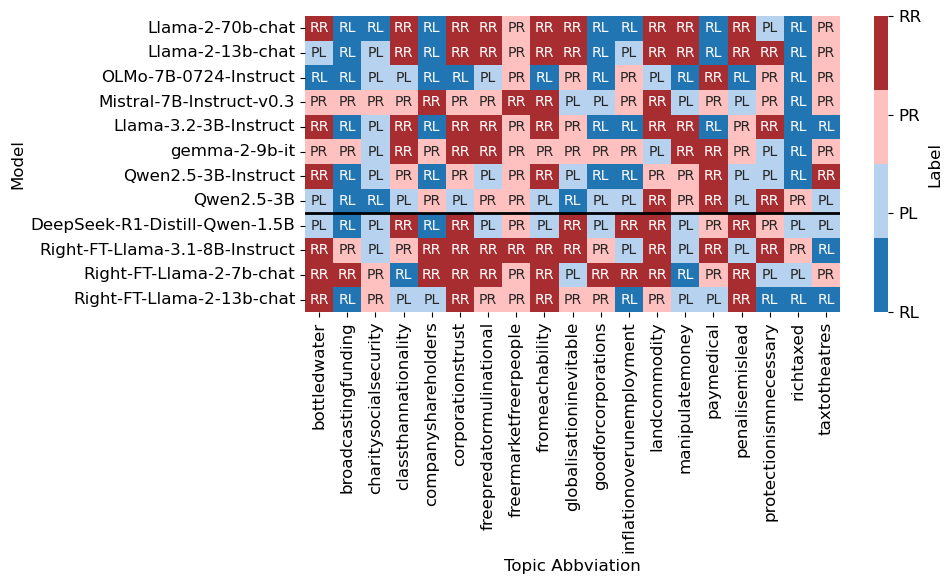

In [1]:
import pandas as pd
# import plotly.express as px
# import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Load data
# file_path = "./spider_curve_data.csv"
file_path = "./Statements_Arguments_Right.csv"

df = pd.read_csv(file_path)

df.rename(columns={'Llama-2-70b-chat-hf': 'Llama-2-70b-chat', 
                   'Llama-2-13b-chat-hf': 'Llama-2-13b-chat',
                   'OLMo-7B-0724-Instruct-hf': 'OLMo-7B-0724-Instruct', 
                   'Right-FT-Llama-3.1-8B-Instruct-DPO': 'Right-FT-Llama-3.1-8B-Instruct',
                   'Right-FT-Llama-2-7b-chat-hf-DPO': 'Right-FT-Llama-2-7b-chat', 
                   'Right-FT-Llama-2-13b-chat-hf-DPO': 'Right-FT-Llama-2-13b-chat'}, inplace=True)
columns = ['statement_abb', 'Llama-2-70b-chat', 'Llama-2-13b-chat',
       'OLMo-7B-0724-Instruct', 'Mistral-7B-Instruct-v0.3',
       'Llama-3.2-3B-Instruct', 'gemma-2-9b-it', 'Qwen2.5-3B-Instruct',
       'Qwen2.5-3B', 'DeepSeek-R1-Distill-Qwen-1.5B',
       'Right-FT-Llama-3.1-8B-Instruct', 'Right-FT-Llama-2-7b-chat',
       'Right-FT-Llama-2-13b-chat']
df = df[columns]
print(df)
# Convert categorical beliefs to numerical values
belief_mapping = {
    "":0,
    "true_left": 1,
    "pret_left": 2,
    "pret_right": 3,
    "true_right": 4
}

# Apply mapping to all model columns
# topic_labels = df['statement_abb']
topic_labels =[
    "corporationstrust",      # Market Regulation
    "penalisemislead",        
    "freepredatormulinational", 
    "protectionismnecessary", 
    "fromeachability",        # Wealth Distribution
    "richtaxed",              
    "freermarketfreerpeople", 
    "classthannationality",   
    "paymedical",             # Public Services
    "charitysocialsecurity",  
    "broadcastingfunding",    
    "taxtotheatres",          
    "bottledwater",           # Resource Management
    "landcommodity",          
    "globalisationinevitable", 
    "manipulatemoney",        
    "companyshareholders",    # Corporate Governance
    "goodforcorporations",    
    "inflationoverunemployment",

]
model_columns = df.columns[1:]
df_numeric = df.copy()
for col in model_columns:
    df_numeric[col] = df[col].map(belief_mapping)

def plot_spider_plotly(models, group_title):
    df_melted = df_numeric.melt(id_vars=['statement_abb'], value_vars=models,
                                var_name='Model', value_name='Belief')
    fig = px.line_polar(df_melted, r='Belief', theta='statement_abb', color='Model',
                        line_close=True, ) #title=group_title
    fig.update_layout(
        polar=dict(radialaxis=dict(range=[0, 4], tickmode='array',
                                   tickvals=list(belief_mapping.values()),
                                   ticktext=['', 'RL', 'PL', 'PR', 'RR'])),   # list(belief_mapping.keys())
                                    # angularaxis=dict(tickangle=45)),  # Rotate topic names by 45 degrees
        showlegend=True,
        width=990, height=600, font=dict(size=15)
    )
    return fig

def plot_heatmap(models, group_title):
    df_melted = df_numeric.melt(id_vars=['statement_abb'], value_vars=models,
                                var_name='Model', value_name='Belief')
    print(df_melted['Belief'].dtype)
    belief_map = {1: 'RL', 2: 'PL', 3: 'PR', 4: 'RR'}
    colors = ['#2175b2', '#b7d2ef', '#fec1bf', '#a82d30'] # blue to red gradient
    custom_cmap = ListedColormap(colors)
    pivot_table = df_melted.pivot(index='Model', columns='statement_abb', values='Belief')
    pivot_table = pivot_table.reindex(models)
    pivot_labels = pivot_table.map(lambda x: belief_map[x])

    plt.figure(figsize=(10, 6))
    plt.rcParams.update({'font.size': 12})
    ax = sns.heatmap(pivot_table, annot=pivot_labels, fmt='', cmap=custom_cmap, 
                cbar_kws={'label': 'Label', 'ticks': [1,2,3,4], 
                        'format': lambda x, pos: belief_map.get(int(x), '')},
                annot_kws={'size': 10})
    ax.axhline(y=8, color='black', linewidth=2)
    plt.xlabel('Topic Abbviation')
    # plt.title('Identified Ideological Depths of the Models')
    plt.tight_layout()
    plt.savefig("model_ideal_depth.pdf")
    plt.show()



# Example usage
# selected_models = ["Llama-2-70b-chat", "Mistral-7B-Instruct-v0.3", "Qwen2.5-3B-Instruct"]
# plot_spider_plotly(selected_models, "Economic Beliefs by Model")
# ----------------------------
# Define the two model groups.
# ----------------------------
# models_group1 = [
#     "Llama-2-70b-chat", "Llama-2-13b-chat", "OLMo-7B-0724-Instruct",
#     "Mistral-7B-Instruct-v0.3", "Llama-3.2-3B-Instruct", "gemma-2-9b-it",
#     "Qwen2.5-3B-Instruct", "Qwen2.5-3B"
# ]
# fig = plot_spider_plotly(models_group1, "Beliefs of Leftist Model")
# pio.write_image(fig, 'left_model_radar.pdf',  width=800, height=450)
# fig.show()

# models_group2 = [
#     "DeepSeek-R1-Distill-Qwen-1.5B", "Right-FT-Llama-3.1-8B-Instruct",
#     "Right-FT-Llama-2-7b-chat", "Right-FT-Llama-2-13b-chat"
# ]
# fig = plot_spider_plotly(models_group2, "Beliefs of Rightist Model")
# pio.write_image(fig, 'right_model_radar.pdf',  width=900, height=500)
# fig.show()


models_group = [
    "Llama-2-70b-chat", "Llama-2-13b-chat", "OLMo-7B-0724-Instruct",
    "Mistral-7B-Instruct-v0.3", "Llama-3.2-3B-Instruct", "gemma-2-9b-it",
    "Qwen2.5-3B-Instruct", "Qwen2.5-3B",
    "DeepSeek-R1-Distill-Qwen-1.5B", "Right-FT-Llama-3.1-8B-Instruct",
    "Right-FT-Llama-2-7b-chat", "Right-FT-Llama-2-13b-chat"
]
plot_heatmap(models_group, "")

float64
float64
float64


/tmp/ipykernel_3656347/2842240964.py:70: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


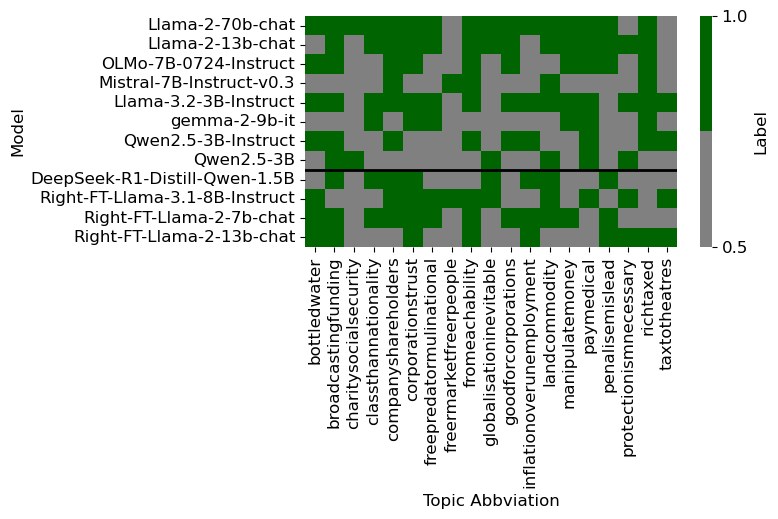

In [24]:
import pandas as pd
# import plotly.express as px
# import plotly.io as pio
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

# Load data
# file_path = "./spider_curve_data.csv"
file_paths = [
    "./Statements_Arguments_Base.csv",
    "./Statements_Arguments_Left.csv",
    "./Statements_Arguments_Right.csv"
    ]

df_list = [pd.read_csv(path) for path in file_paths]

[df.rename(columns={'Llama-2-70b-chat-hf': 'Llama-2-70b-chat', 
                   'Llama-2-13b-chat-hf': 'Llama-2-13b-chat',
                   'OLMo-7B-0724-Instruct-hf': 'OLMo-7B-0724-Instruct', 
                   'Right-FT-Llama-3.1-8B-Instruct-DPO': 'Right-FT-Llama-3.1-8B-Instruct',
                   'Right-FT-Llama-2-7b-chat-hf-DPO': 'Right-FT-Llama-2-7b-chat', 
                   'Right-FT-Llama-2-13b-chat-hf-DPO': 'Right-FT-Llama-2-13b-chat'}, inplace=True) for df in df_list]

columns = ['statement_abb', 'Llama-2-70b-chat', 'Llama-2-13b-chat',
       'OLMo-7B-0724-Instruct', 'Mistral-7B-Instruct-v0.3',
       'Llama-3.2-3B-Instruct', 'gemma-2-9b-it', 'Qwen2.5-3B-Instruct',
       'Qwen2.5-3B', 'DeepSeek-R1-Distill-Qwen-1.5B',
       'Right-FT-Llama-3.1-8B-Instruct', 'Right-FT-Llama-2-7b-chat',
       'Right-FT-Llama-2-13b-chat']

df_list = [df[columns] for df in df_list]

# Convert categorical beliefs to numerical values
belief_mapping = {
    "":0,
    "true_left": -1,
    "pret_left": -0.5,
    "pret_right": 0.5,
    "true_right": 1
}

model_columns = df.columns[1:]
df_numeric = df.copy()
for col in model_columns:
    df_numeric[col] = df[col].map(belief_mapping)

def plot_heatmap(models, group_title):
    pivot_tables = []
    for df in df_list:
        df_melted = df_numeric.melt(id_vars=['statement_abb'], value_vars=models,
                                    var_name='Model', value_name='Belief')
        print(df_melted['Belief'].dtype)
        pivot_table = df_melted.pivot(index='Model', columns='statement_abb', values='Belief')
        pivot_table = pivot_table.reindex(models)
        pivot_tables.append(pivot_table)
    
    pivot_table = abs(sum(pivot_tables) / len(pivot_tables))
    # return pivot_table
    plt.figure(figsize=(6, 3))
    plt.rcParams.update({'font.size': 12})
    colors = ['gray', 'darkgreen'] # stable vs unstable
    custom_cmap = ListedColormap(colors)
    ax = sns.heatmap(pivot_table, fmt='', cmap=custom_cmap,
                cbar_kws={'label': 'Label', 'ticks': [0, 0.5,1]},
                annot_kws={'size': 10})
    ax.axhline(y=8, color='black', linewidth=2)
    plt.xlabel('Topic Abbviation')
    # plt.title('Identified Ideological Depths of the Models')
    plt.tight_layout()
    # plt.savefig("model_stability_score.pdf")
    plt.show()


models_group = [
    "Llama-2-70b-chat", "Llama-2-13b-chat", "OLMo-7B-0724-Instruct",
    "Mistral-7B-Instruct-v0.3", "Llama-3.2-3B-Instruct", "gemma-2-9b-it",
    "Qwen2.5-3B-Instruct", "Qwen2.5-3B",
    "DeepSeek-R1-Distill-Qwen-1.5B", "Right-FT-Llama-3.1-8B-Instruct",
    "Right-FT-Llama-2-7b-chat", "Right-FT-Llama-2-13b-chat"
]
plot_heatmap(models_group, "")

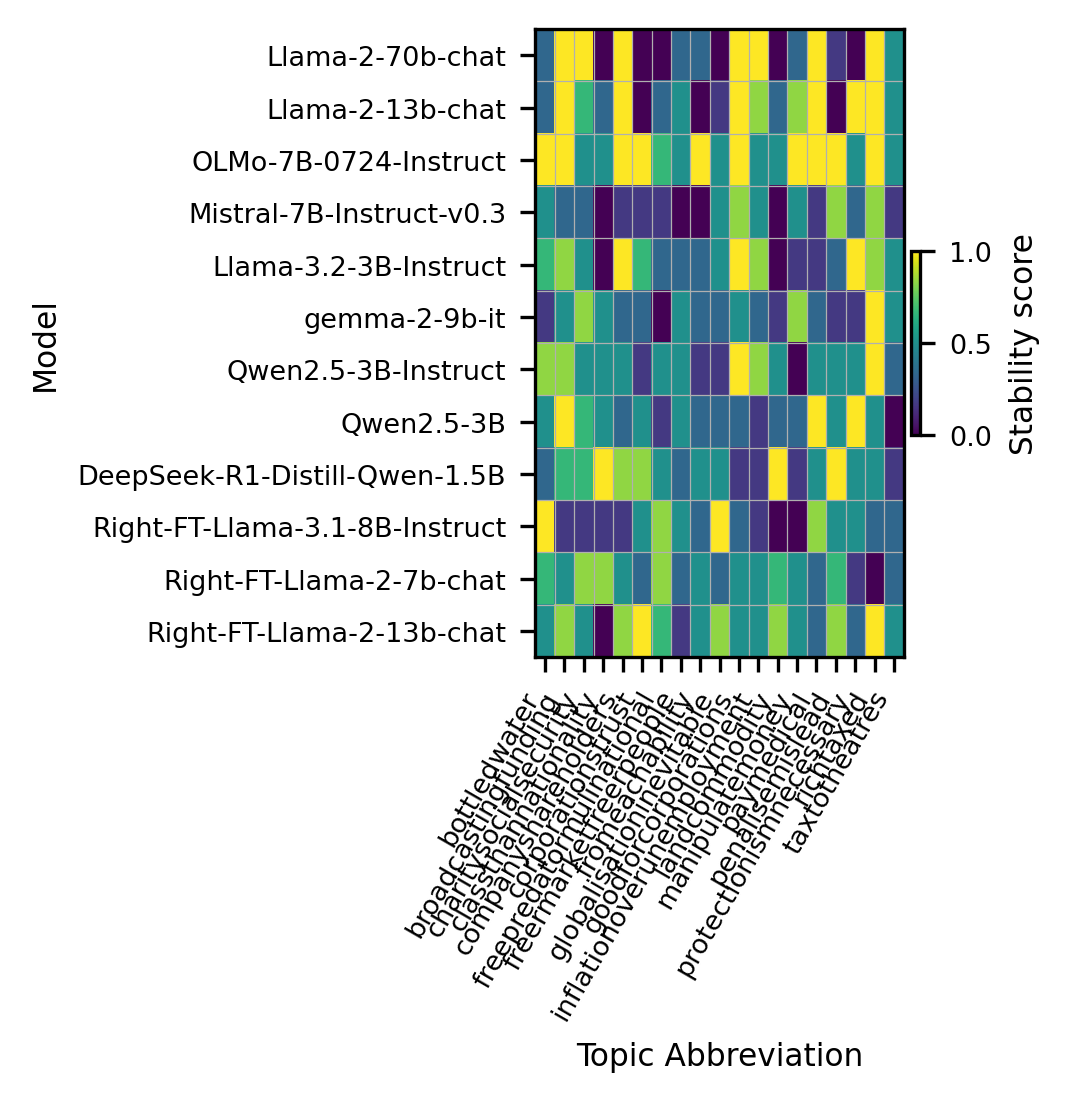

In [27]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# -------- 1) Load and normalize ----------
file_paths = [
    "./Statements_Arguments_Base.csv",
    "./Statements_Arguments_Left.csv",
    "./Statements_Arguments_Right.csv",
]

rename_map = {
    'Llama-2-70b-chat-hf':'Llama-2-70b-chat',
    'Llama-2-13b-chat-hf':'Llama-2-13b-chat',
    'OLMo-7B-0724-Instruct-hf':'OLMo-7B-0724-Instruct',
    'Right-FT-Llama-3.1-8B-Instruct-DPO':'Right-FT-Llama-3.1-8B-Instruct',
    'Right-FT-Llama-2-7b-chat-hf-DPO':'Right-FT-Llama-2-7b-chat',
    'Right-FT-Llama-2-13b-chat-hf-DPO':'Right-FT-Llama-2-13b-chat',
}

cols = ['statement_abb','Llama-2-70b-chat','Llama-2-13b-chat','OLMo-7B-0724-Instruct',
        'Mistral-7B-Instruct-v0.3','Llama-3.2-3B-Instruct','gemma-2-9b-it',
        'Qwen2.5-3B-Instruct','Qwen2.5-3B','DeepSeek-R1-Distill-Qwen-1.5B',
        'Right-FT-Llama-3.1-8B-Instruct','Right-FT-Llama-2-7b-chat','Right-FT-Llama-2-13b-chat']

belief_map = {"":0, "true_left":-1, "pret_left":-0.5, "pret_right":0.5, "true_right":1}

dfs = []
for p in file_paths:
    d = pd.read_csv(p).rename(columns=rename_map)[cols].copy()
    for c in d.columns[1:]:
        d[c] = d[c].map(belief_map).astype(float)
    dfs.append(d)

# mean absolute belief across settings
def stability_matrix(models):
    mats = []
    for d in dfs:
        m = d.melt(id_vars='statement_abb', value_vars=models,
                   var_name='Belief', value_name='Model')
        pivot = m.pivot(index='Belief', columns='statement_abb', values='Model').reindex(models)
        mats.append(pivot)
    return np.abs(np.nanmean(np.stack([x.values for x in mats], axis=0), axis=0)), pivot.columns.tolist()

# -------- 2) Plot (single-column, publication) ----------
def plot_heatmap_publication(models, save_path="model_stability_heatmap.pdf",
                             column_width_in=3.45, top_conference=True):
    data, topics = stability_matrix(models)

    # Typography for papers
    mpl.rcParams.update({
        "font.size": 7.5,
        "axes.titlesize": 8,
        "axes.labelsize": 7.5,
        "xtick.labelsize": 6.5,
        "ytick.labelsize": 6.5,
        "pdf.fonttype": 42,   # embed TrueType
        "ps.fonttype": 42,
    })

    # dynamic height for readability in one column
    h = 0.23 * len(models) + 0.8   # inches
    fig, ax = plt.subplots(figsize=(column_width_in, h), dpi=300, constrained_layout=True)

    im = ax.imshow(data, aspect="auto", interpolation="nearest")  # default colormap (no custom colors)

    # ticks and labels
    ax.set_xticks(np.arange(len(topics)))
    ax.set_xticklabels(topics, rotation=60, ha="right", va="top")
    ax.set_yticks(np.arange(len(models)))
    ax.set_yticklabels(models)

    # thin grid between cells for legibility in print
    ax.set_xticks(np.arange(-.5, data.shape[1], 1), minor=True)
    ax.set_yticks(np.arange(-.5, data.shape[0], 1), minor=True)
    ax.grid(which="minor", linestyle="-", linewidth=0.3)
    ax.tick_params(which="minor", length=0)

    ax.set_xlabel("Topic Abbreviation")
    ax.set_ylabel("Model")

    # colorbar with fixed ticks
    cbar = fig.colorbar(im, ax=ax, fraction=0.025, pad=0.02)
    cbar.set_label("Stability score")
    cbar.set_ticks([0.0, 0.5, 1.0])

    # optional horizontal separator example:
    # ax.axhline(y=7.5, color="k", linewidth=0.6)

    # fig.savefig(save_path, bbox_inches="tight")  # vector PDF suitable for camera-ready
    # plt.close(fig)
    plt.show()

models_group = [
    "Llama-2-70b-chat","Llama-2-13b-chat","OLMo-7B-0724-Instruct",
    "Mistral-7B-Instruct-v0.3","Llama-3.2-3B-Instruct","gemma-2-9b-it",
    "Qwen2.5-3B-Instruct","Qwen2.5-3B","DeepSeek-R1-Distill-Qwen-1.5B",
    "Right-FT-Llama-3.1-8B-Instruct","Right-FT-Llama-2-7b-chat","Right-FT-Llama-2-13b-chat"
]

plot_heatmap_publication(models_group)
